### Decisison Tree Classification

In [33]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Load the dataset
df = pd.read_csv('titanic.csv').drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


### Data Preprocessing

#### Find the missing values

In [35]:
df.isnull()

,Survived,Pclass,Sex,Age,Fare
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
886,False,False,False,False,False
887,False,False,False,False,False
888,False,False,False,True,False
889,False,False,False,False,False


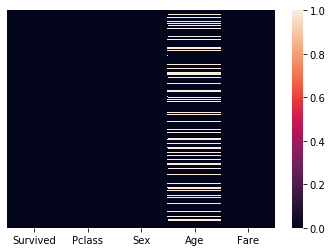

In [36]:
#use heatmap to find the missing values in features
sns.heatmap(df.isnull(),yticklabels=False)

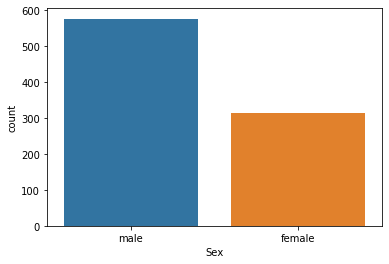

In [37]:
sns.countplot('Sex',data=df)

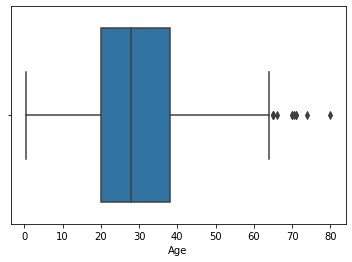

In [38]:
sns.boxplot('Age',data=df)

In [39]:
import math

In [40]:
median_Age = math.floor(df['Age'].mean())
median_Age

29

In [41]:
df['Age']=df['Age'].fillna(median_Age)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,29.0,23.4500
889,1,1,male,26.0,30.0000


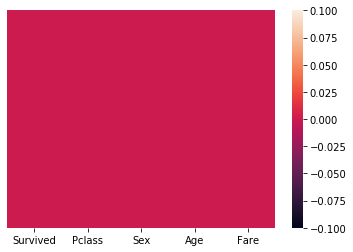

In [42]:
sns.heatmap(df.isnull(),yticklabels=False)

### Convert the categorical Features

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le =LabelEncoder()

In [46]:
df['Sex_n'] = le.fit_transform(df["Sex"])
df.head()

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [47]:
df=df.drop('Sex',axis=1)

In [48]:
df

,Survived,Pclass,Age,Fare,Sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,29.0,23.4500,0
889,1,1,26.0,30.0000,1


### Split the dataset using Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size =0.30,random_state=10)

In [66]:
len(y_train)

623

In [67]:
len(X_test)

268

In [68]:
y_train

7      0
765    1
339    0
374    0
183    1
      ..
369    1
320    0
527    0
125    1
265    0
Name: Survived, Length: 623, dtype: int64

### Build Model using Decision Tree

In [69]:
from sklearn import tree

In [78]:
model = tree.DecisionTreeClassifier()

In [79]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
model.score(X_test,y_test)

0.7761194029850746

### Accuracy of the Model is 78%